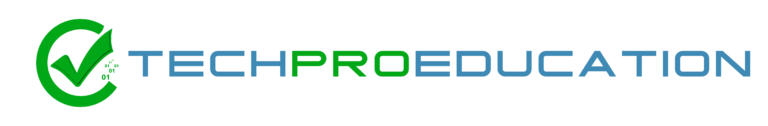

In [ ]:
# iki class'i birbirinden ayiriyorsan bunun adi binary classification denir

In [ ]:
# imbalance datalarda asagilarda class_weight var, onu yapinca recall yükseliyor

# Keras Classification

<span class="girk">We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.</span>

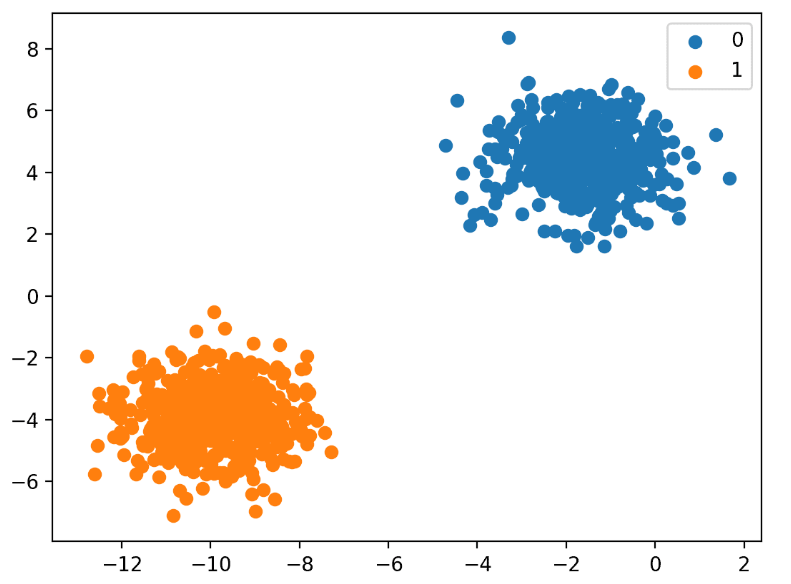

In [ ]:
#genelde bu tarz olanlar 0 ve 1 olarak ayrilir, aradigin sey 1 olarak nitelendiriyoruz,ki onu bulalim
#

## Import  libraries & data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)   
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("Churn_Modelling.csv", index_col='RowNumber')  #(çöörnn)
df.head()
#Tenure:Number of years for which the customer has been with the bank
#NumOfProducts :Number of bank products the customer is utilising
#Binary flag 1 if the customer closed account with bank and 0 if the customer is retained

# churn müsteri kaybetme demekmis,
# bunu intershipte uygulayacagiz, örnegin bir banka ile ilgili ,bu bankadan ayrilan kisi o ayrildigi firmanin churn'ü oluyor
# 


#row numberda index olsun dendi. olmasada olur
#Tenure müsterinin sirket bünyesinde ne kadardir oldugu

# Exited -bankadan cikanlar 1 oluyor, churn olmus mu olmamis mi? na bakyioruz
#balance müsterilerin hesaindaki paralar galiba 

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


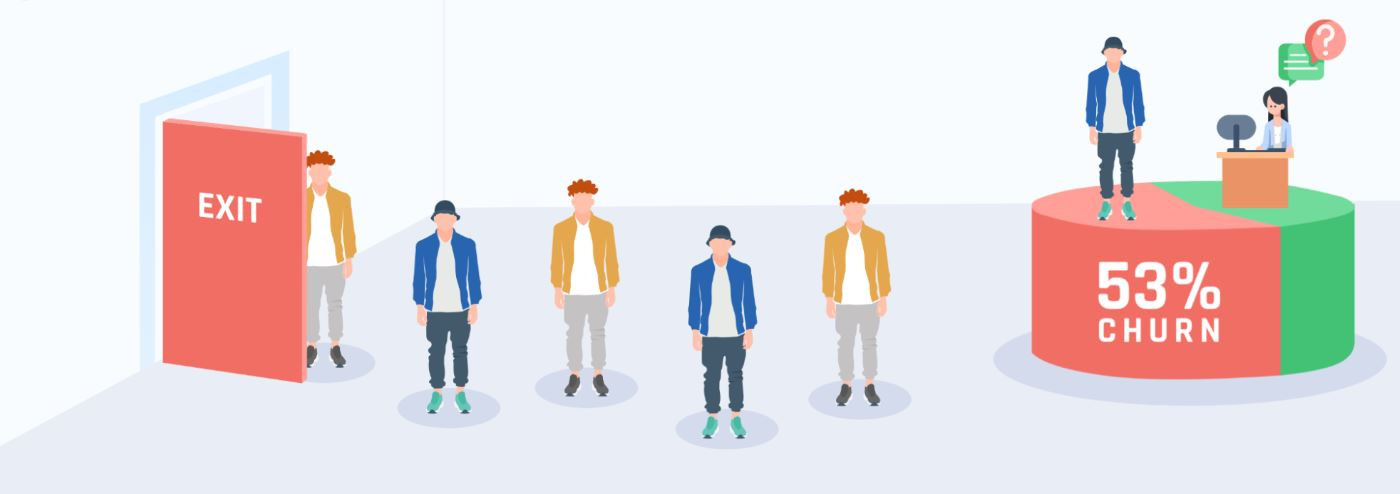

## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.shape

(10000, 13)

In [6]:
df.isnull().sum().any()

False

In [7]:
df.duplicated().sum()

#duplicate yok

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


In [9]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)
#bunlari sileleim dedik

0    7963
1    2037
Name: Exited, dtype: int64


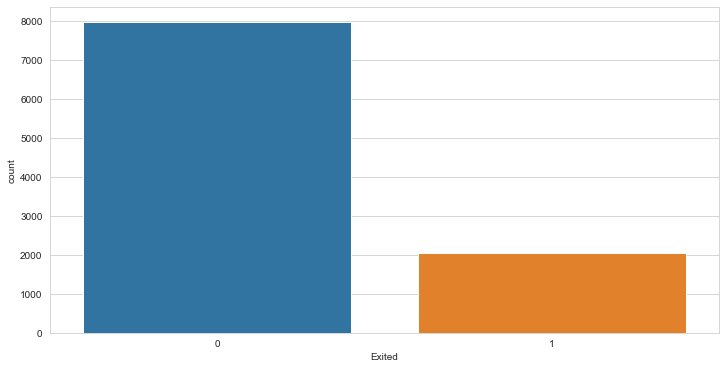

In [10]:
print(df.Exited.value_counts())
sns.countplot(df["Exited"]);

#exited olanlara bakalim dedik, 1 ler churn olanlar ,
#imbalance bir daha var ,

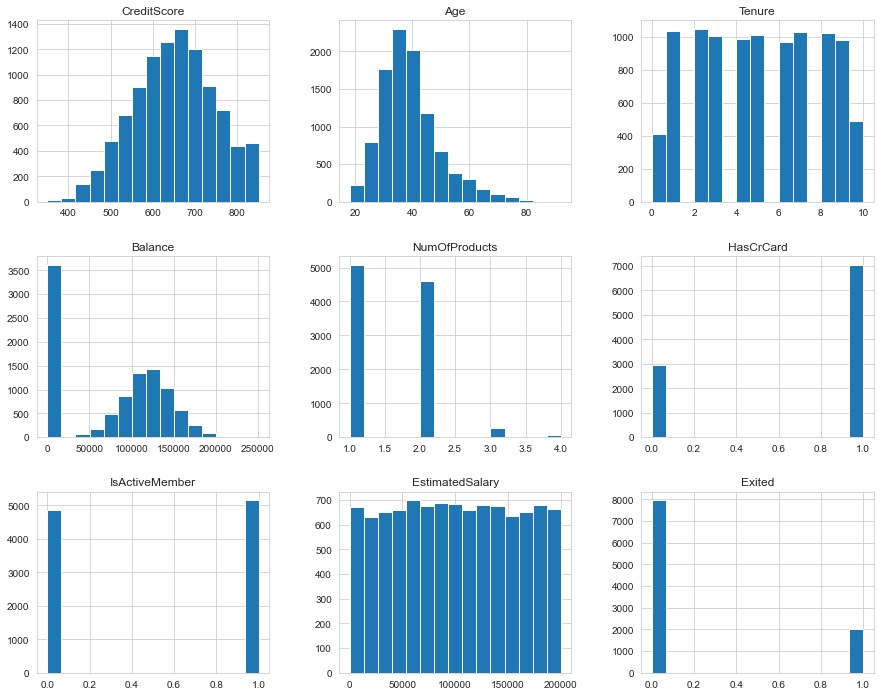

In [11]:
df.hist(figsize=(15, 12), bins=15);

#burdan veri ile ilgili insight cikarabiliyorsun
# balance da sifir olan co var
# ensondaki de exited olanlar var

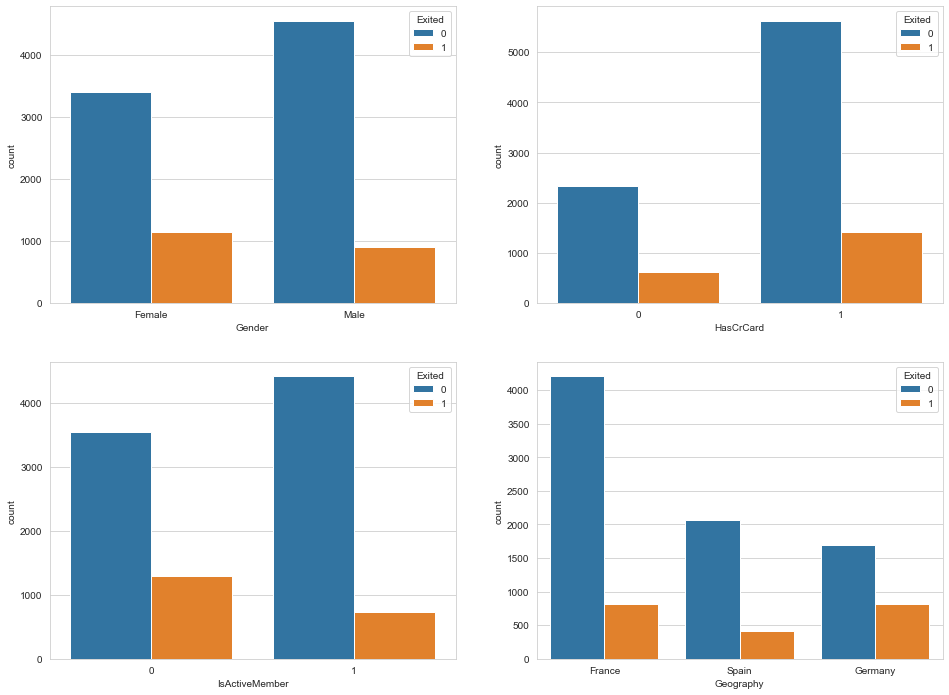

In [12]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(16, 12))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(data=df, x=i, hue="Exited")

    #gender'e göre exited ve baska seylere bakabiliriz

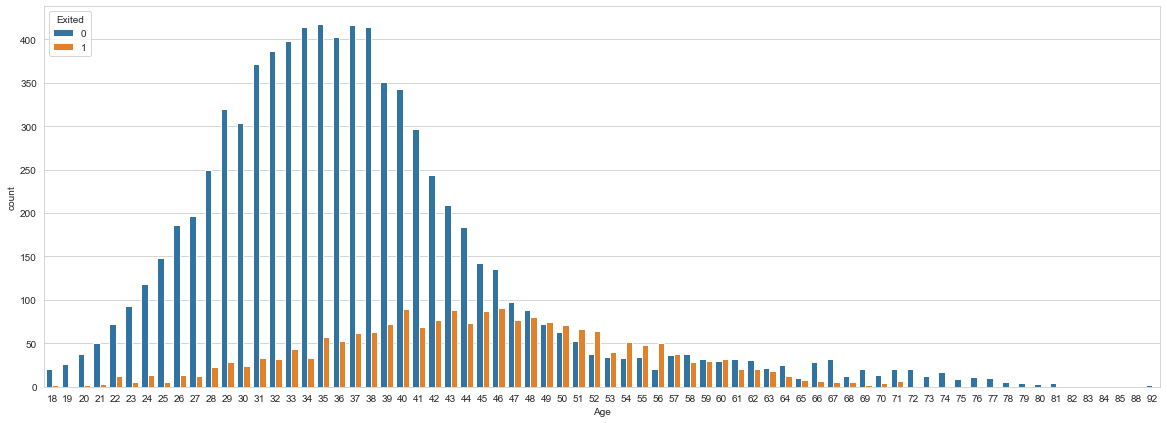

In [13]:
plt.figure(figsize=(20, 7))
sns.countplot(df.Age, hue=df.Exited);

#burda ayrilan ve olanlarin dagilimina bakiyoruz

<AxesSubplot:>

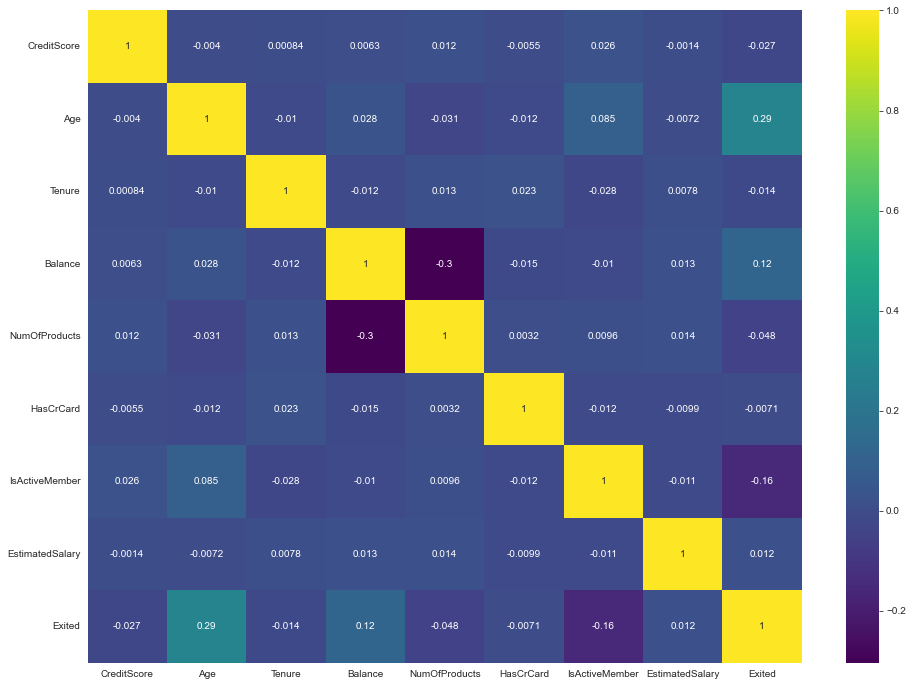

In [14]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

<AxesSubplot:>

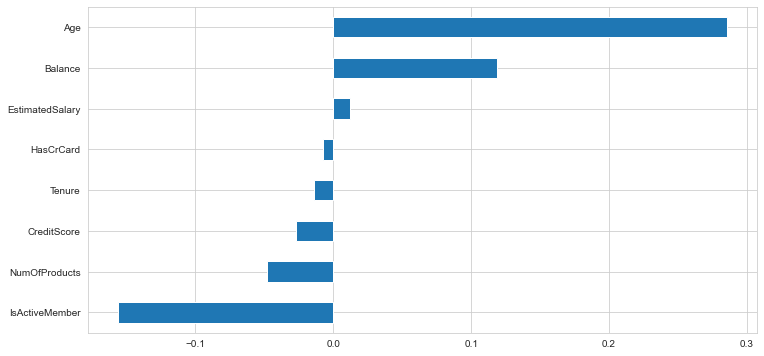

In [15]:
df.corr()['Exited'][:-1].sort_values().plot.barh()

# age biraz daha iliskili olmus exited olma durumuna
#sirketler icin bu anlamli oluyor ne yin önemli oldugunu gösteriyor

In [16]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,
1,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
2,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
3,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
4,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
5,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


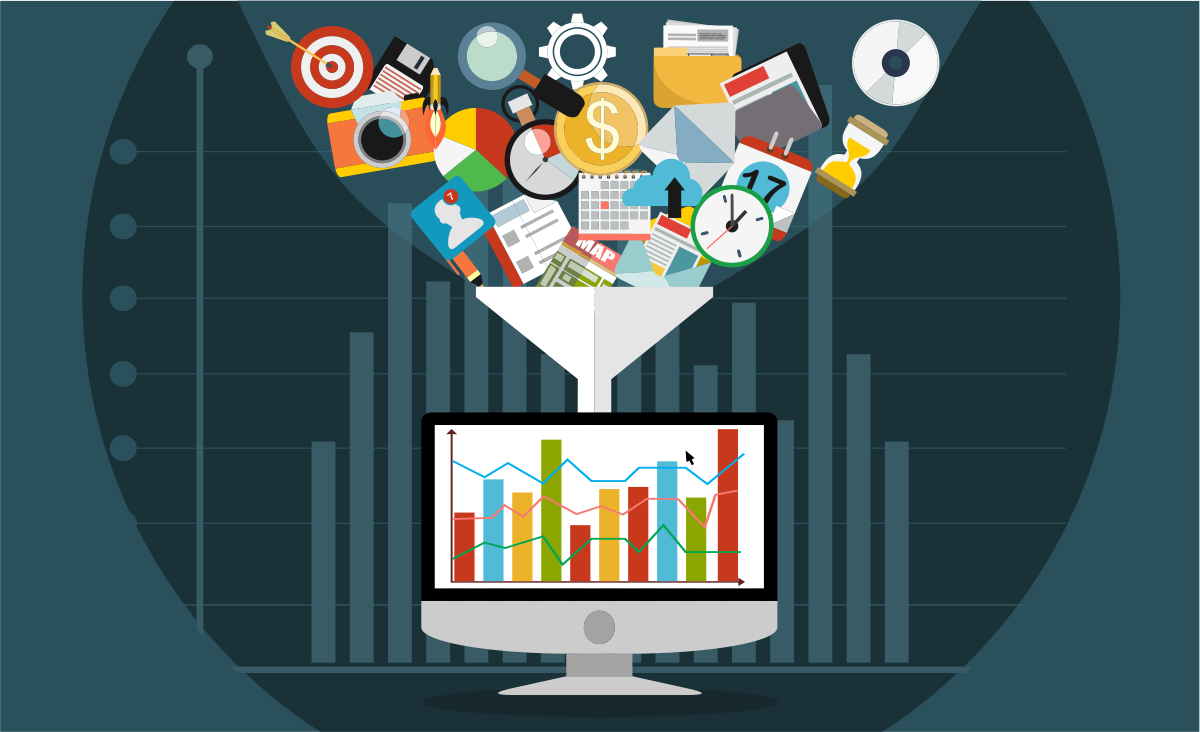

## Preprocessing of Data

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [18]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values  #burda sadece outputta values kullanalim demisler,büyük datalarda values olmali, array seviyor büyük datalar
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y, #imbalance,data oldugu icin,test ve trainde de ayni oran olmasi icin ugrasiyor,cünkü nasil ögrendiyse ona uygun tahmin yapsin
                                                    test_size=0.1,
                                                    random_state=seed)


In [19]:
scaler = MinMaxScaler()

# DL de de pipeline var, ama bu örneklerde yok

In [20]:
X_train = scaler.fit_transform(X_train) #sadece train setine fit transform yapiyoruz
X_test = scaler.transform(X_test)  #teste sadece transform

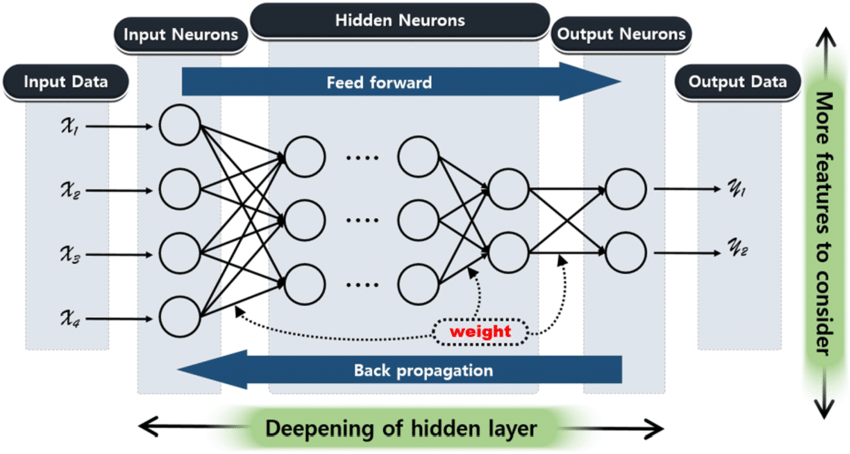

## Modelling & Model Performance

### without class_weigth

In [21]:
X_train.shape

(9000, 11)

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [23]:
from tensorflow.keras.optimizers import Adam

#optimizerdeda Gradient descentte adam modelini kullan

In [99]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu"))  #16 nöronlu katman
model.add(Dense(8, activation="relu"))   # relu yerine baska biseyde secebilecektik
model.add(Dense(1, activation="sigmoid")) 

opt = Adam(lr=0.002)mv
model.compile(optimizer=opt, 
              loss="binary_crossentropy",#bunun ekran görüntüsü vardi sigmoid var ,binary model ile ugrastigimiz icin binary olani kullaniyoruz
              metrics=["Recall"])  # recall sectik,burda 1 olanlar önemliydi, onun icin recall sectik
# Recall — the percentage of positive cases you caught
# Recall, false negative’in gözardı edilemez olduğu durumlarda önemli bir metrik. recall = TP / TP +FN
# Recall’a bakma sebebimiz tamamiyle paydadaki false negative’ler, yani hesabına devam ettiği tahmin edilen ve hesabını kapatan insanlar. 


# bazen inputtun 2/3 ü deniyor, bazilarida 2nin katlari olarak alin deniyor

#burda iki tane hiddenlayer var, output hidden layer olarak sayilmiyor

#inputta bizim feattureslrimiz

# model.add(Dense(1, activation="sigmoid"))  burda outputta sigmoid kullanmislar bunun classification oldugunu görüyoruz
# burda Dense iki yapmadik, cünkü bize 1ler lazimdi 0lar lazim degil,yani setosa ve virginica gibi degil,0lari istemedik



In [100]:
early_stop = EarlyStopping(monitor="val_loss",   # neye bakarak early stopping yap demek icin, bu degere bakarak yapiyor,validation loss
                           mode="auto", #düsüklügemi göre mi yükseklige göre mi, yoksa  ben mi otomatik belirleyeyim diyor,yani hangi kritere göre durduraym
                           verbose=1,
                           patience=25)  # 25 degerden sonra rakam cok degismiyorsa,(peeyy-şıınss)
#The patience is often set somewhere between 10 and 100 (10 or 20 is more common), 
#but it really depends on your dataset and network.

# bir early stopping koyalim dedik

# buraya her val_loss yazin deniyor, sadece loss girersen o düsecegi icin validation loss deniyor

In [101]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop])

        # burda recall degerininde valadition degerleri bulunuyor

Epoch 1/200
64/64 [==============================] - 1s 8ms/step - loss: 0.5154 - recall: 0.0000e+00 - val_loss: 0.4810 - val_recall: 0.0000e+00
Epoch 2/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4834 - recall: 0.0000e+00 - val_loss: 0.4621 - val_recall: 0.0000e+00
Epoch 3/200
64/64 [==============================] - 0s 4ms/step - loss: 0.4700 - recall: 0.0333 - val_loss: 0.4463 - val_recall: 0.0773
Epoch 4/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4595 - recall: 0.0763 - val_loss: 0.4348 - val_recall: 0.1215
Epoch 5/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4514 - recall: 0.1205 - val_loss: 0.4237 - val_recall: 0.1657
Epoch 6/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4434 - recall: 0.1308 - val_loss: 0.4170 - val_recall: 0.1602
Epoch 7/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4374 - recall: 0.1713 - val_loss: 0.4079 - val_recall: 0.2044
Epoch 8/200
64/64 [======

64/64 [==============================] - 0s 3ms/step - loss: 0.3362 - recall: 0.4576 - val_loss: 0.2961 - val_recall: 0.5912
Epoch 61/200
64/64 [==============================] - 0s 3ms/step - loss: 0.3372 - recall: 0.4661 - val_loss: 0.3023 - val_recall: 0.6188
Epoch 62/200
64/64 [==============================] - 0s 3ms/step - loss: 0.3371 - recall: 0.4685 - val_loss: 0.3001 - val_recall: 0.5856
Epoch 63/200
64/64 [==============================] - 0s 3ms/step - loss: 0.3360 - recall: 0.4600 - val_loss: 0.2959 - val_recall: 0.5801
Epoch 64/200
64/64 [==============================] - 0s 3ms/step - loss: 0.3383 - recall: 0.4673 - val_loss: 0.2970 - val_recall: 0.6077
Epoch 65/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3354 - recall: 0.4564 - val_loss: 0.2971 - val_recall: 0.5580
Epoch 66/200
64/64 [==============================] - 0s 3ms/step - loss: 0.3352 - recall: 0.4637 - val_loss: 0.3010 - val_recall: 0.5967
Epoch 67/200
64/64 [===========================

64/64 [==============================] - 0s 3ms/step - loss: 0.3298 - recall: 0.4752 - val_loss: 0.2918 - val_recall: 0.5746
Epoch 120/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3303 - recall: 0.4685 - val_loss: 0.2925 - val_recall: 0.5635
Epoch 121/200
64/64 [==============================] - 0s 3ms/step - loss: 0.3305 - recall: 0.4764 - val_loss: 0.2939 - val_recall: 0.5746
Epoch 122/200
64/64 [==============================] - 0s 3ms/step - loss: 0.3323 - recall: 0.4812 - val_loss: 0.2921 - val_recall: 0.4917
Epoch 123/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3321 - recall: 0.4764 - val_loss: 0.2936 - val_recall: 0.5359
Epoch 124/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3296 - recall: 0.4728 - val_loss: 0.2912 - val_recall: 0.5414
Epoch 125/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3308 - recall: 0.4867 - val_loss: 0.2926 - val_recall: 0.5414
Epoch 126/200
64/64 [====================

In [102]:
model.summary()

#337 tane güncellenecek parametre varmis

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 16)                192       
                                                                 
 dense_28 (Dense)            (None, 8)                 136       
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [103]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.515,0.000,0.481,0.000
1,0.483,0.000,0.462,0.000
2,0.470,0.033,0.446,0.077
3,0.459,0.076,0.435,0.122
4,0.451,0.120,0.424,0.166


<AxesSubplot:>

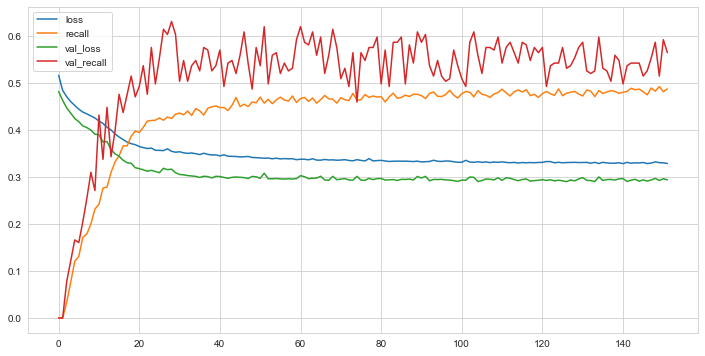

In [104]:
loss_df.plot()

# 

In [105]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")  #0.5 threshold degeri olarak belirledik
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[761  35]
 [107  97]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.91       796
           1       0.73      0.48      0.58       204

    accuracy                           0.86      1000
   macro avg       0.81      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



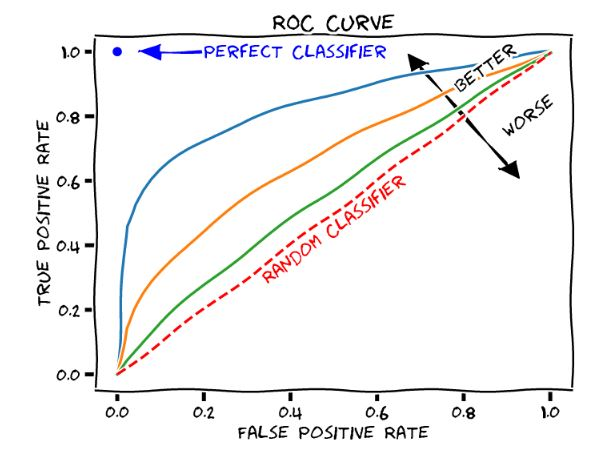

### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

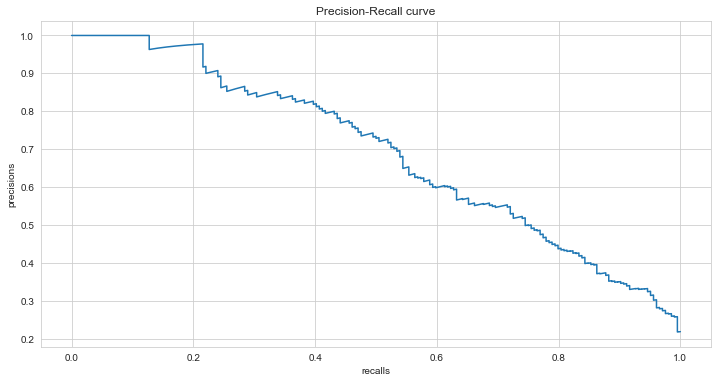

In [106]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()
# roc curve, sınıflandırma performansını gösterir
#burda ikisininde yüksek olmasi iyi olur

In [107]:
average_precision_score(y_test, y_pred_proba)

0.691939150605047

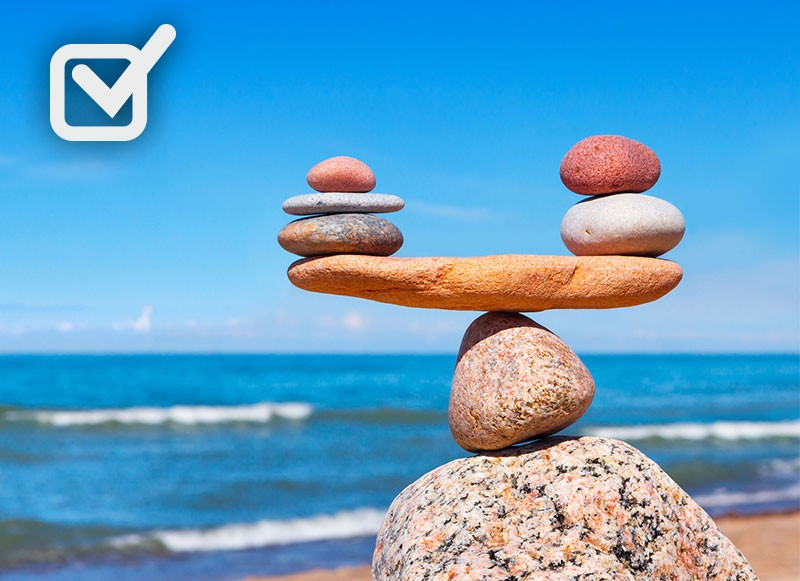

### with class_weigth

In [116]:
model = Sequential()

tf.random.set_seed(seed)

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.002)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [117]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

# class_weight bunlar bunlarda onlarin balance'lik durumunu ortaya koyuyor sanirim

{0: 0.6278777731268314, 1: 2.454991816693944}

In [118]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights) #buraya bu degiskeni atiyoruz

Epoch 1/200
64/64 [==============================] - 1s 7ms/step - loss: 0.6798 - recall: 0.3971 - val_loss: 0.6430 - val_recall: 0.5525
Epoch 2/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6435 - recall: 0.6211 - val_loss: 0.6168 - val_recall: 0.7182
Epoch 3/200
64/64 [==============================] - 0s 4ms/step - loss: 0.6204 - recall: 0.6640 - val_loss: 0.5729 - val_recall: 0.6740
Epoch 4/200
64/64 [==============================] - 0s 4ms/step - loss: 0.6050 - recall: 0.6846 - val_loss: 0.5503 - val_recall: 0.6796
Epoch 5/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5929 - recall: 0.6895 - val_loss: 0.5563 - val_recall: 0.7017
Epoch 6/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5839 - recall: 0.7004 - val_loss: 0.5001 - val_recall: 0.6188
Epoch 7/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5768 - recall: 0.7070 - val_loss: 0.5460 - val_recall: 0.7459
Epoch 8/200
64/64 [======================

64/64 [==============================] - 0s 4ms/step - loss: 0.4623 - recall: 0.7639 - val_loss: 0.4493 - val_recall: 0.8343
Epoch 61/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4638 - recall: 0.7712 - val_loss: 0.4684 - val_recall: 0.8564
Epoch 62/200
64/64 [==============================] - 0s 4ms/step - loss: 0.4622 - recall: 0.7682 - val_loss: 0.4431 - val_recall: 0.8398
Epoch 63/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4617 - recall: 0.7669 - val_loss: 0.4311 - val_recall: 0.8287
Epoch 64/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4650 - recall: 0.7621 - val_loss: 0.4707 - val_recall: 0.8619
Epoch 65/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4612 - recall: 0.7700 - val_loss: 0.4113 - val_recall: 0.8066
Epoch 66/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4622 - recall: 0.7730 - val_loss: 0.4511 - val_recall: 0.8453
Epoch 67/200
64/64 [===========================

<AxesSubplot:>

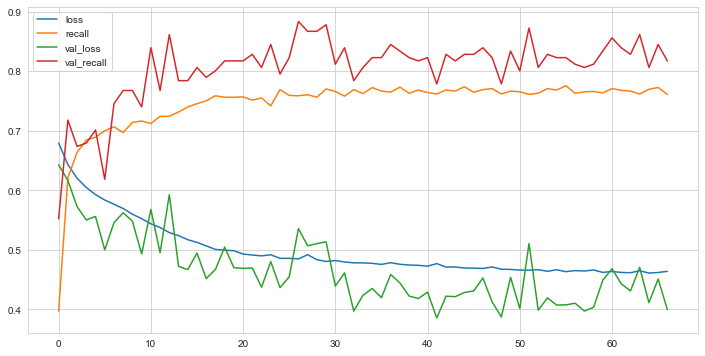

In [119]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()m

#class_weight alindiktan sonra recall yükselmis

In [120]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


#      precision    recall  f1-score   support

#  0       0.86      0.97      0.92       796
#  1       0.79      0.41      0.54       204 #bu class_weight olmamis hali,asagidaki degerlere göre kiyasla


[[632 164]
 [ 52 152]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       796
           1       0.48      0.75      0.58       204

    accuracy                           0.78      1000
   macro avg       0.70      0.77      0.72      1000
weighted avg       0.83      0.78      0.80      1000



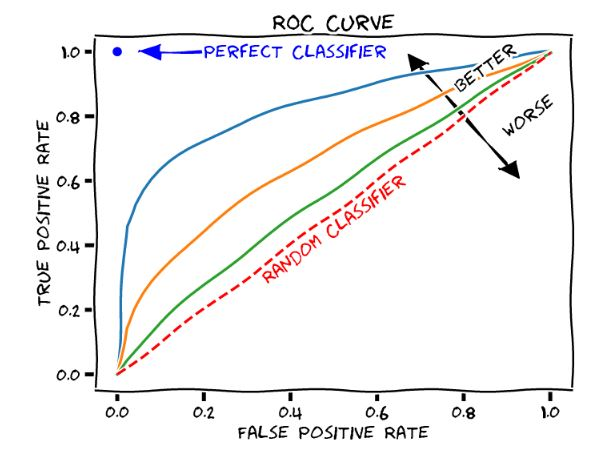

### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

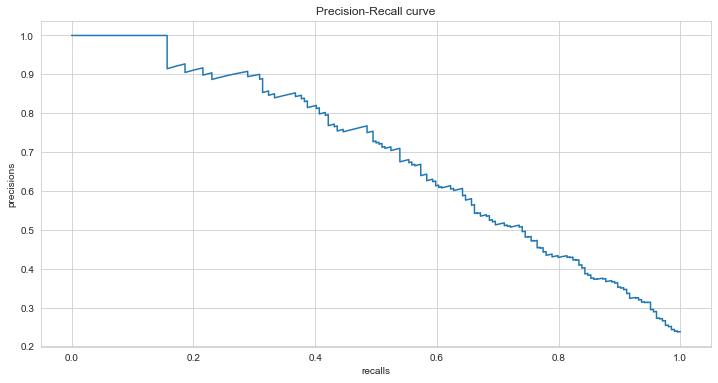

In [121]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()
# roc curve, sınıflandırma performansını gösterir

In [122]:
average_precision_score(y_test, y_pred_proba)   #0.692983743350624

#burda degisiklik olmadi ama recall tarafinin artmasi sevindirici gelisme

0.6907510922710862

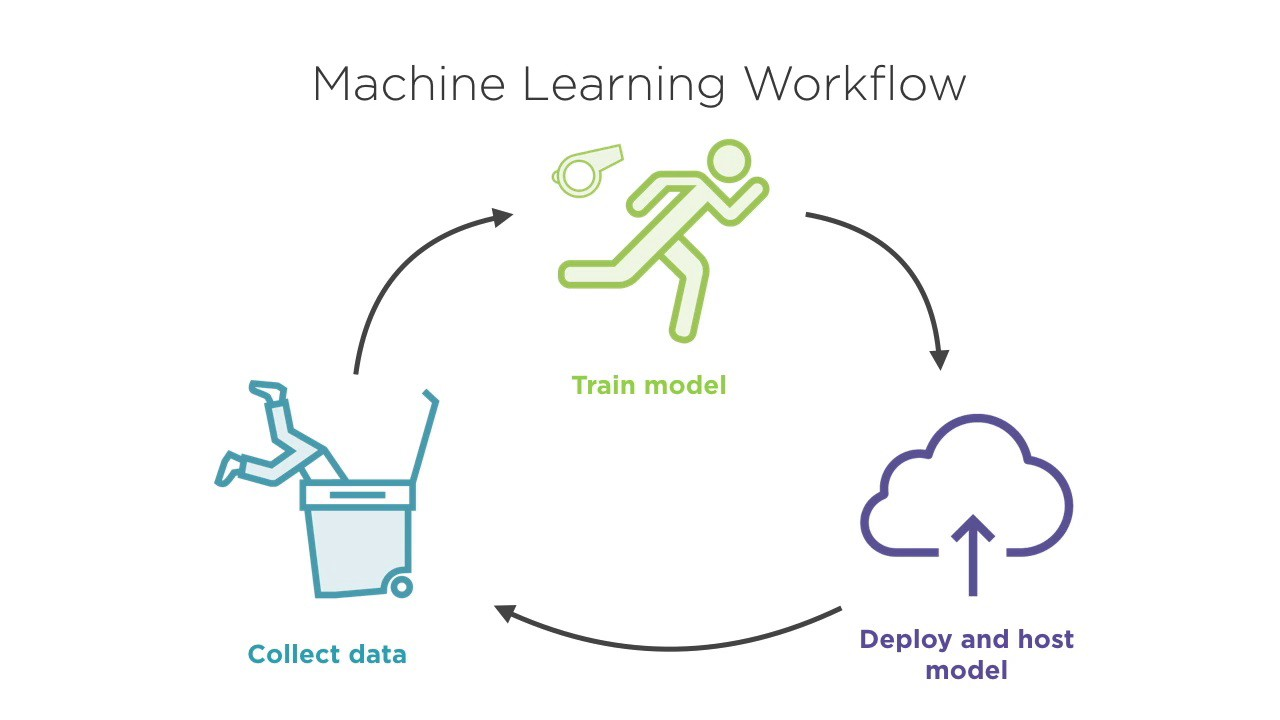

## Final Model and Model Deployment

In [123]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [124]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.002)

model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test), 
          callbacks=[early_stop],  #early stopta iyi oldugunu görmüstük
          batch_size=256,
          epochs=200,
          verbose=1,
          class_weight=class_weights) # bu parametre degerleri yükseltti
# {'batch_size': 256,'learn_rate': 0.003,'optimizer': keras.optimizer_v2.adam.Adam}
# pay attention!! validation data 

Epoch 1/200
36/36 [==============================] - 1s 11ms/step - loss: 0.6838 - recall: 0.3442 - val_loss: 0.6745 - val_recall: 0.5392
Epoch 2/200
36/36 [==============================] - 0s 3ms/step - loss: 0.6592 - recall: 0.5499 - val_loss: 0.6586 - val_recall: 0.6127
Epoch 3/200
36/36 [==============================] - 0s 4ms/step - loss: 0.6359 - recall: 0.6399 - val_loss: 0.6436 - val_recall: 0.6471
Epoch 4/200
36/36 [==============================] - 0s 3ms/step - loss: 0.6211 - recall: 0.6656 - val_loss: 0.6318 - val_recall: 0.6569
Epoch 5/200
36/36 [==============================] - 0s 4ms/step - loss: 0.6115 - recall: 0.6929 - val_loss: 0.6221 - val_recall: 0.6471
Epoch 6/200
36/36 [==============================] - 0s 3ms/step - loss: 0.6018 - recall: 0.6738 - val_loss: 0.6218 - val_recall: 0.6765
Epoch 7/200
36/36 [==============================] - 0s 3ms/step - loss: 0.5913 - recall: 0.7092 - val_loss: 0.5846 - val_recall: 0.6569
Epoch 8/200
36/36 [=====================

36/36 [==============================] - 0s 5ms/step - loss: 0.4664 - recall: 0.7627 - val_loss: 0.4375 - val_recall: 0.7353
Epoch 61/200
36/36 [==============================] - 0s 4ms/step - loss: 0.4623 - recall: 0.7747 - val_loss: 0.4496 - val_recall: 0.7549
Epoch 62/200
36/36 [==============================] - 0s 3ms/step - loss: 0.4600 - recall: 0.7670 - val_loss: 0.4628 - val_recall: 0.7598
Epoch 63/200
36/36 [==============================] - 0s 3ms/step - loss: 0.4607 - recall: 0.7665 - val_loss: 0.4474 - val_recall: 0.7500
Epoch 64/200
36/36 [==============================] - 0s 3ms/step - loss: 0.4607 - recall: 0.7660 - val_loss: 0.4410 - val_recall: 0.7451
Epoch 65/200
36/36 [==============================] - 0s 4ms/step - loss: 0.4606 - recall: 0.7670 - val_loss: 0.4629 - val_recall: 0.7794
Epoch 66/200
36/36 [==============================] - 0s 4ms/step - loss: 0.4614 - recall: 0.7720 - val_loss: 0.4409 - val_recall: 0.7500
Epoch 67/200
36/36 [===========================

<AxesSubplot:>

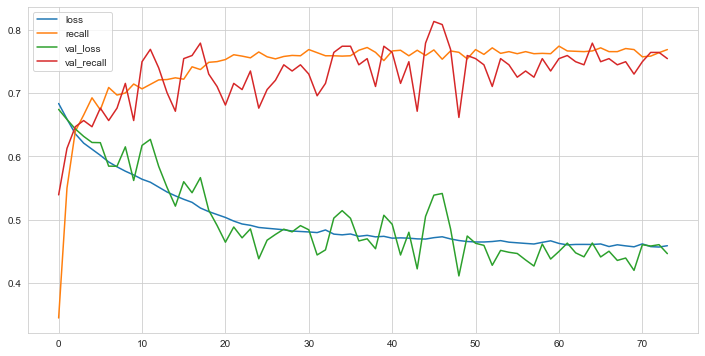

In [125]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [126]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.44610291719436646
recall :  0.7549019455909729


In [127]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[627 169]
 [ 50 154]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       796
           1       0.48      0.75      0.58       204

    accuracy                           0.78      1000
   macro avg       0.70      0.77      0.72      1000
weighted avg       0.83      0.78      0.80      1000



In [128]:
model.save('model_churn.h5')

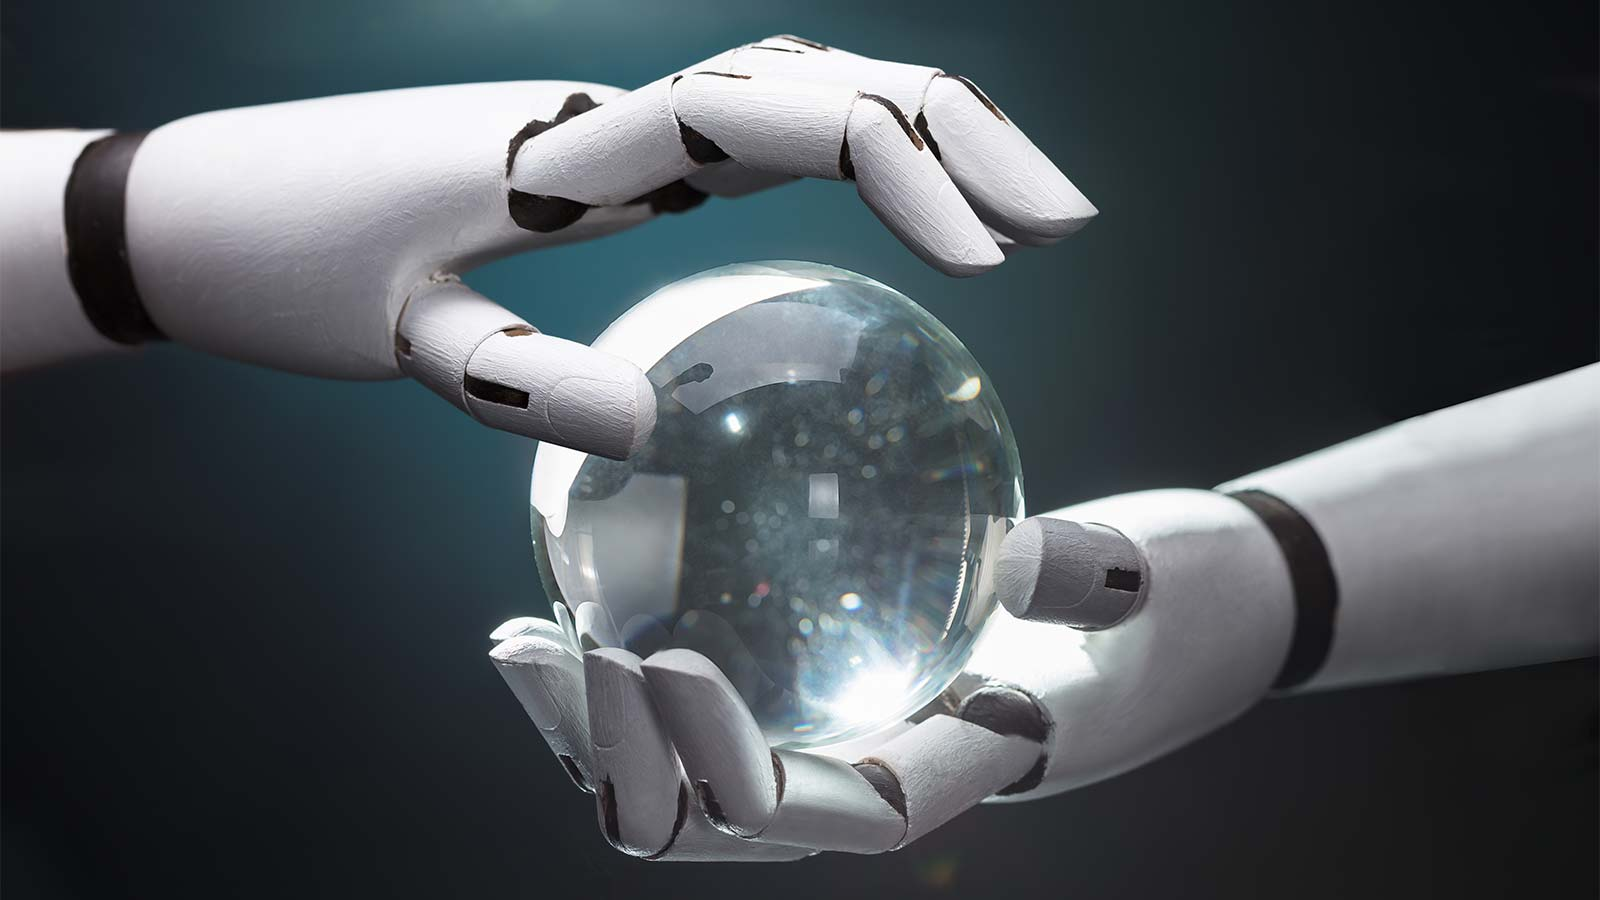

### Prediction

In [129]:
single_customer = df.drop('Exited', axis=1).iloc[0]
single_customer

CreditScore            619.000
Age                     42.000
Tenure                   2.000
Balance                  0.000
NumOfProducts            1.000
HasCrCard                1.000
IsActiveMember           1.000
EstimatedSalary     101348.880
Geography_Germany        0.000
Geography_Spain          0.000
Gender_Male              0.000
Name: 1, dtype: float64

In [130]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 11))
single_customer

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 0.        , 0.        ,
        0.        ]])

In [131]:
y_pred =(model.predict(single_customer) > 0.5).astype("int32")
y_pred

array([[1]])

In [132]:
df["Exited"].iloc[0]

1

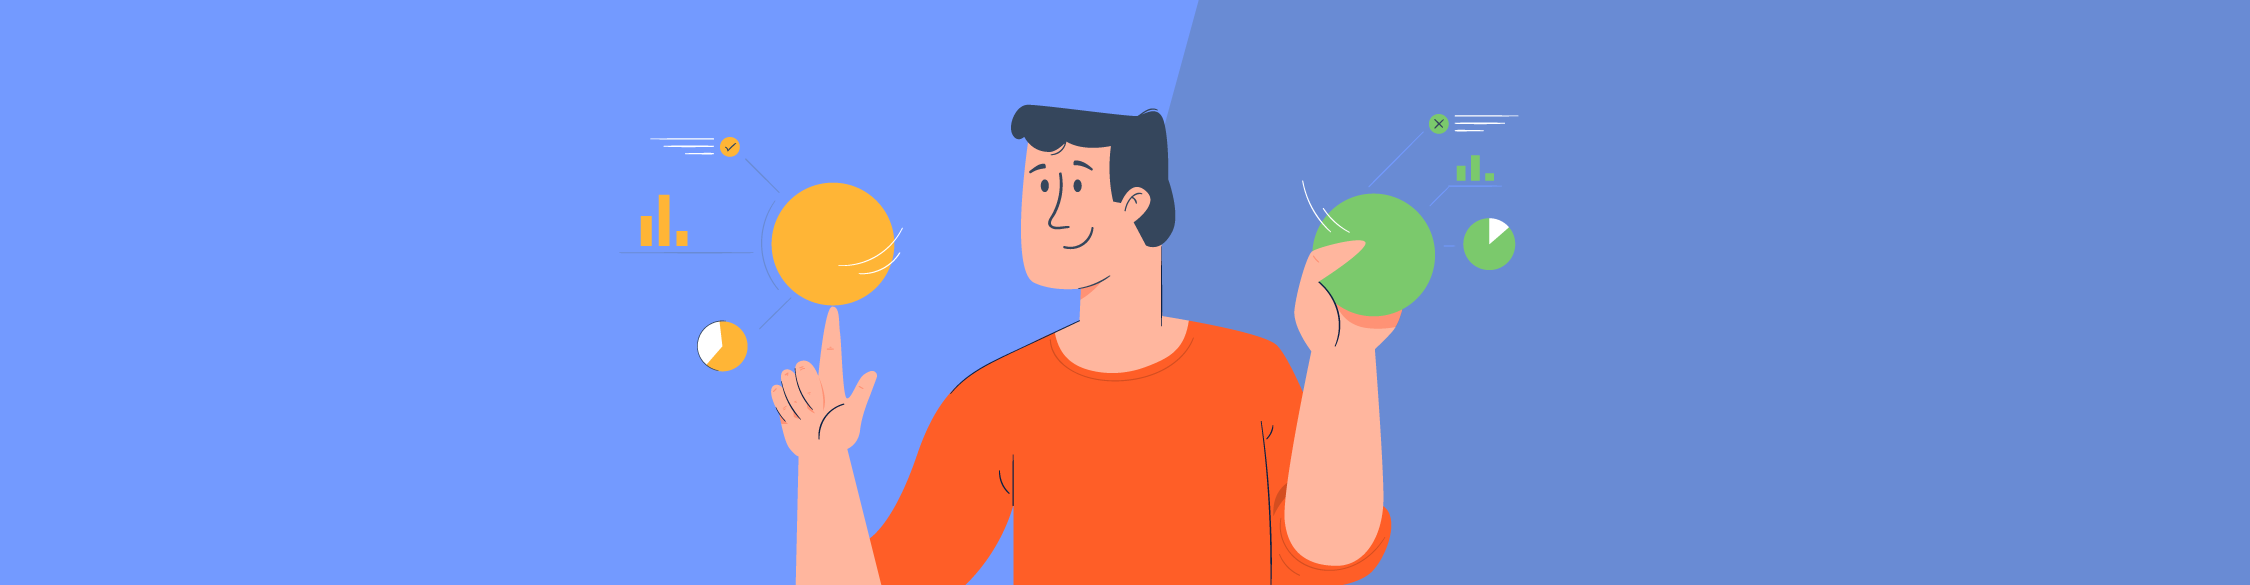

## Comparison with ML

### Logistic Regression

In [133]:
from sklearn.linear_model import LogisticRegression

In [134]:
log_model=LogisticRegression(class_weight='balanced')
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[558 238]
 [ 67 137]]
              precision    recall  f1-score   support

           0       0.89      0.70      0.79       796
           1       0.37      0.67      0.47       204

    accuracy                           0.69      1000
   macro avg       0.63      0.69      0.63      1000
weighted avg       0.79      0.69      0.72      1000



### Random Forest

In [135]:
from sklearn.ensemble import RandomForestClassifier


In [136]:
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[761  35]
 [125  79]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.90       796
           1       0.69      0.39      0.50       204

    accuracy                           0.84      1000
   macro avg       0.78      0.67      0.70      1000
weighted avg       0.83      0.84      0.82      1000



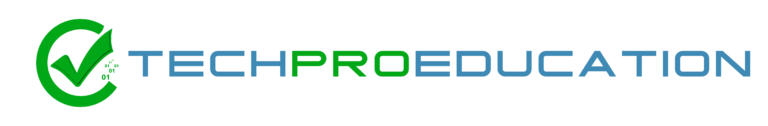